# Designing of Quantum circuit for Simplified AES

Author: Sukhsagar Dubey

Advisor: Utasav Banarjee

In [16]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, QuantumRegister ,ClassicalRegister, execute

from qiskit.visualization import plot_histogram
# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()
backend=Aer.get_backend('qasm_simulator')

ibmqfactory.load_account:WARNING:2023-06-29 01:51:14,439: Credentials are already in use. The existing account in the session will be replaced.


In [17]:
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub="ibm-q")
device = provider.get_backend('simulator_mps') # 100 qubit quantum simulator 

ibmqfactory.load_account:WARNING:2023-06-29 01:51:27,293: Credentials are already in use. The existing account in the session will be replaced.


## Encryption Block diagram
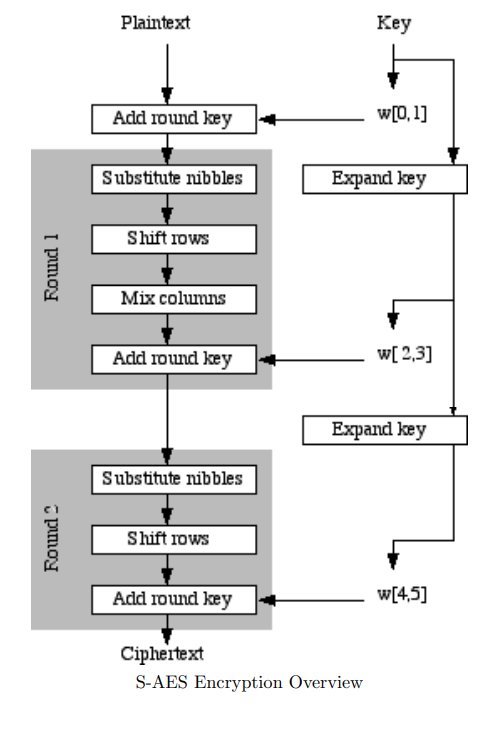

## S-Box (Nibble Substitution)
  
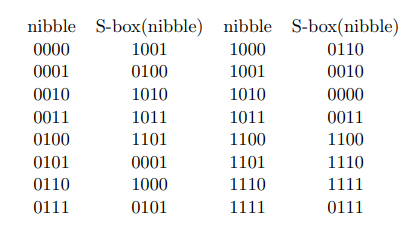

look up table : 94abd1856203cef7

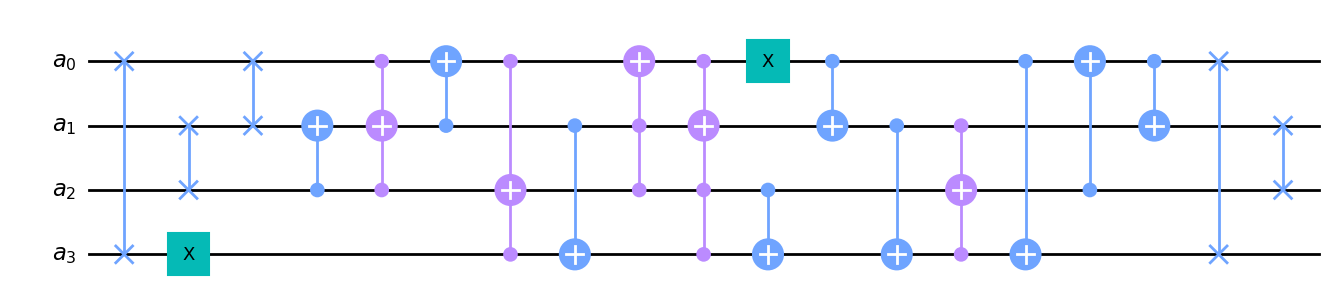

In [18]:
# Quantum circuit for 
a=QuantumRegister(4,name='a')#Input register
qc=QuantumCircuit(a) 
qc.swap(0,3)
qc.swap(1,2)
qc.swap(0,1)
qc.cx(2,1)
qc.ccx(2,0,1)
qc.cx(1,0)
qc.x(3)
qc.ccx(3,0,2)
qc.cx(1,3)
qc.ccx(2,1,0)
qc.mcx([0,3,2],1)
qc.x(0)
qc.cx(2,3)
qc.cx(0,1)
qc.cx(1,3)
qc.ccx(3,1,2)
qc.cx([0,2,0],[3,0,1])
qc.swap(0,3)
qc.swap(1,2)
MI=qc.to_gate(label='MI')  
MI_dag=qc.inverse().to_gate(label='MI_dag')
qc.draw('mpl')

## MixColumns


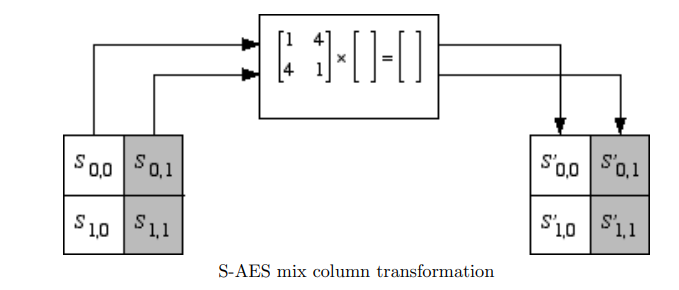

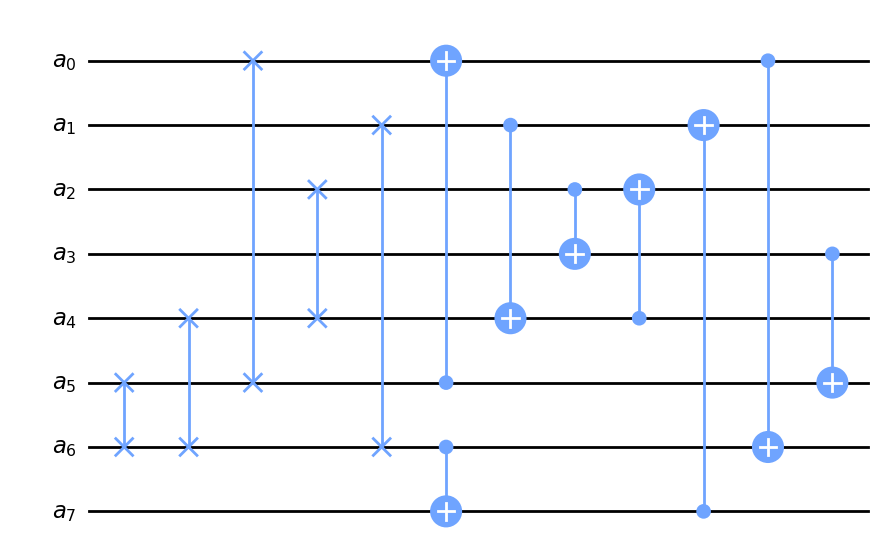

In [5]:
a=QuantumRegister(8,name='a')#Input register
qc=QuantumCircuit(a) 
# circuit for Mixcolumn
qc.swap(5,6)
qc.swap(4,6)
qc.swap(2,4)
qc.swap(1,6)
qc.swap(0,5)
qc.cx([1,5,2,4,6,7,0,3],[4,0,3,2,7,1,6,5])
mc=qc.to_gate(label='MC')  
qc.draw('mpl')

## Key expansion 

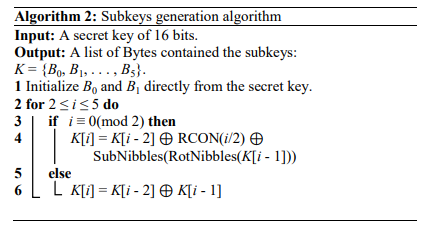

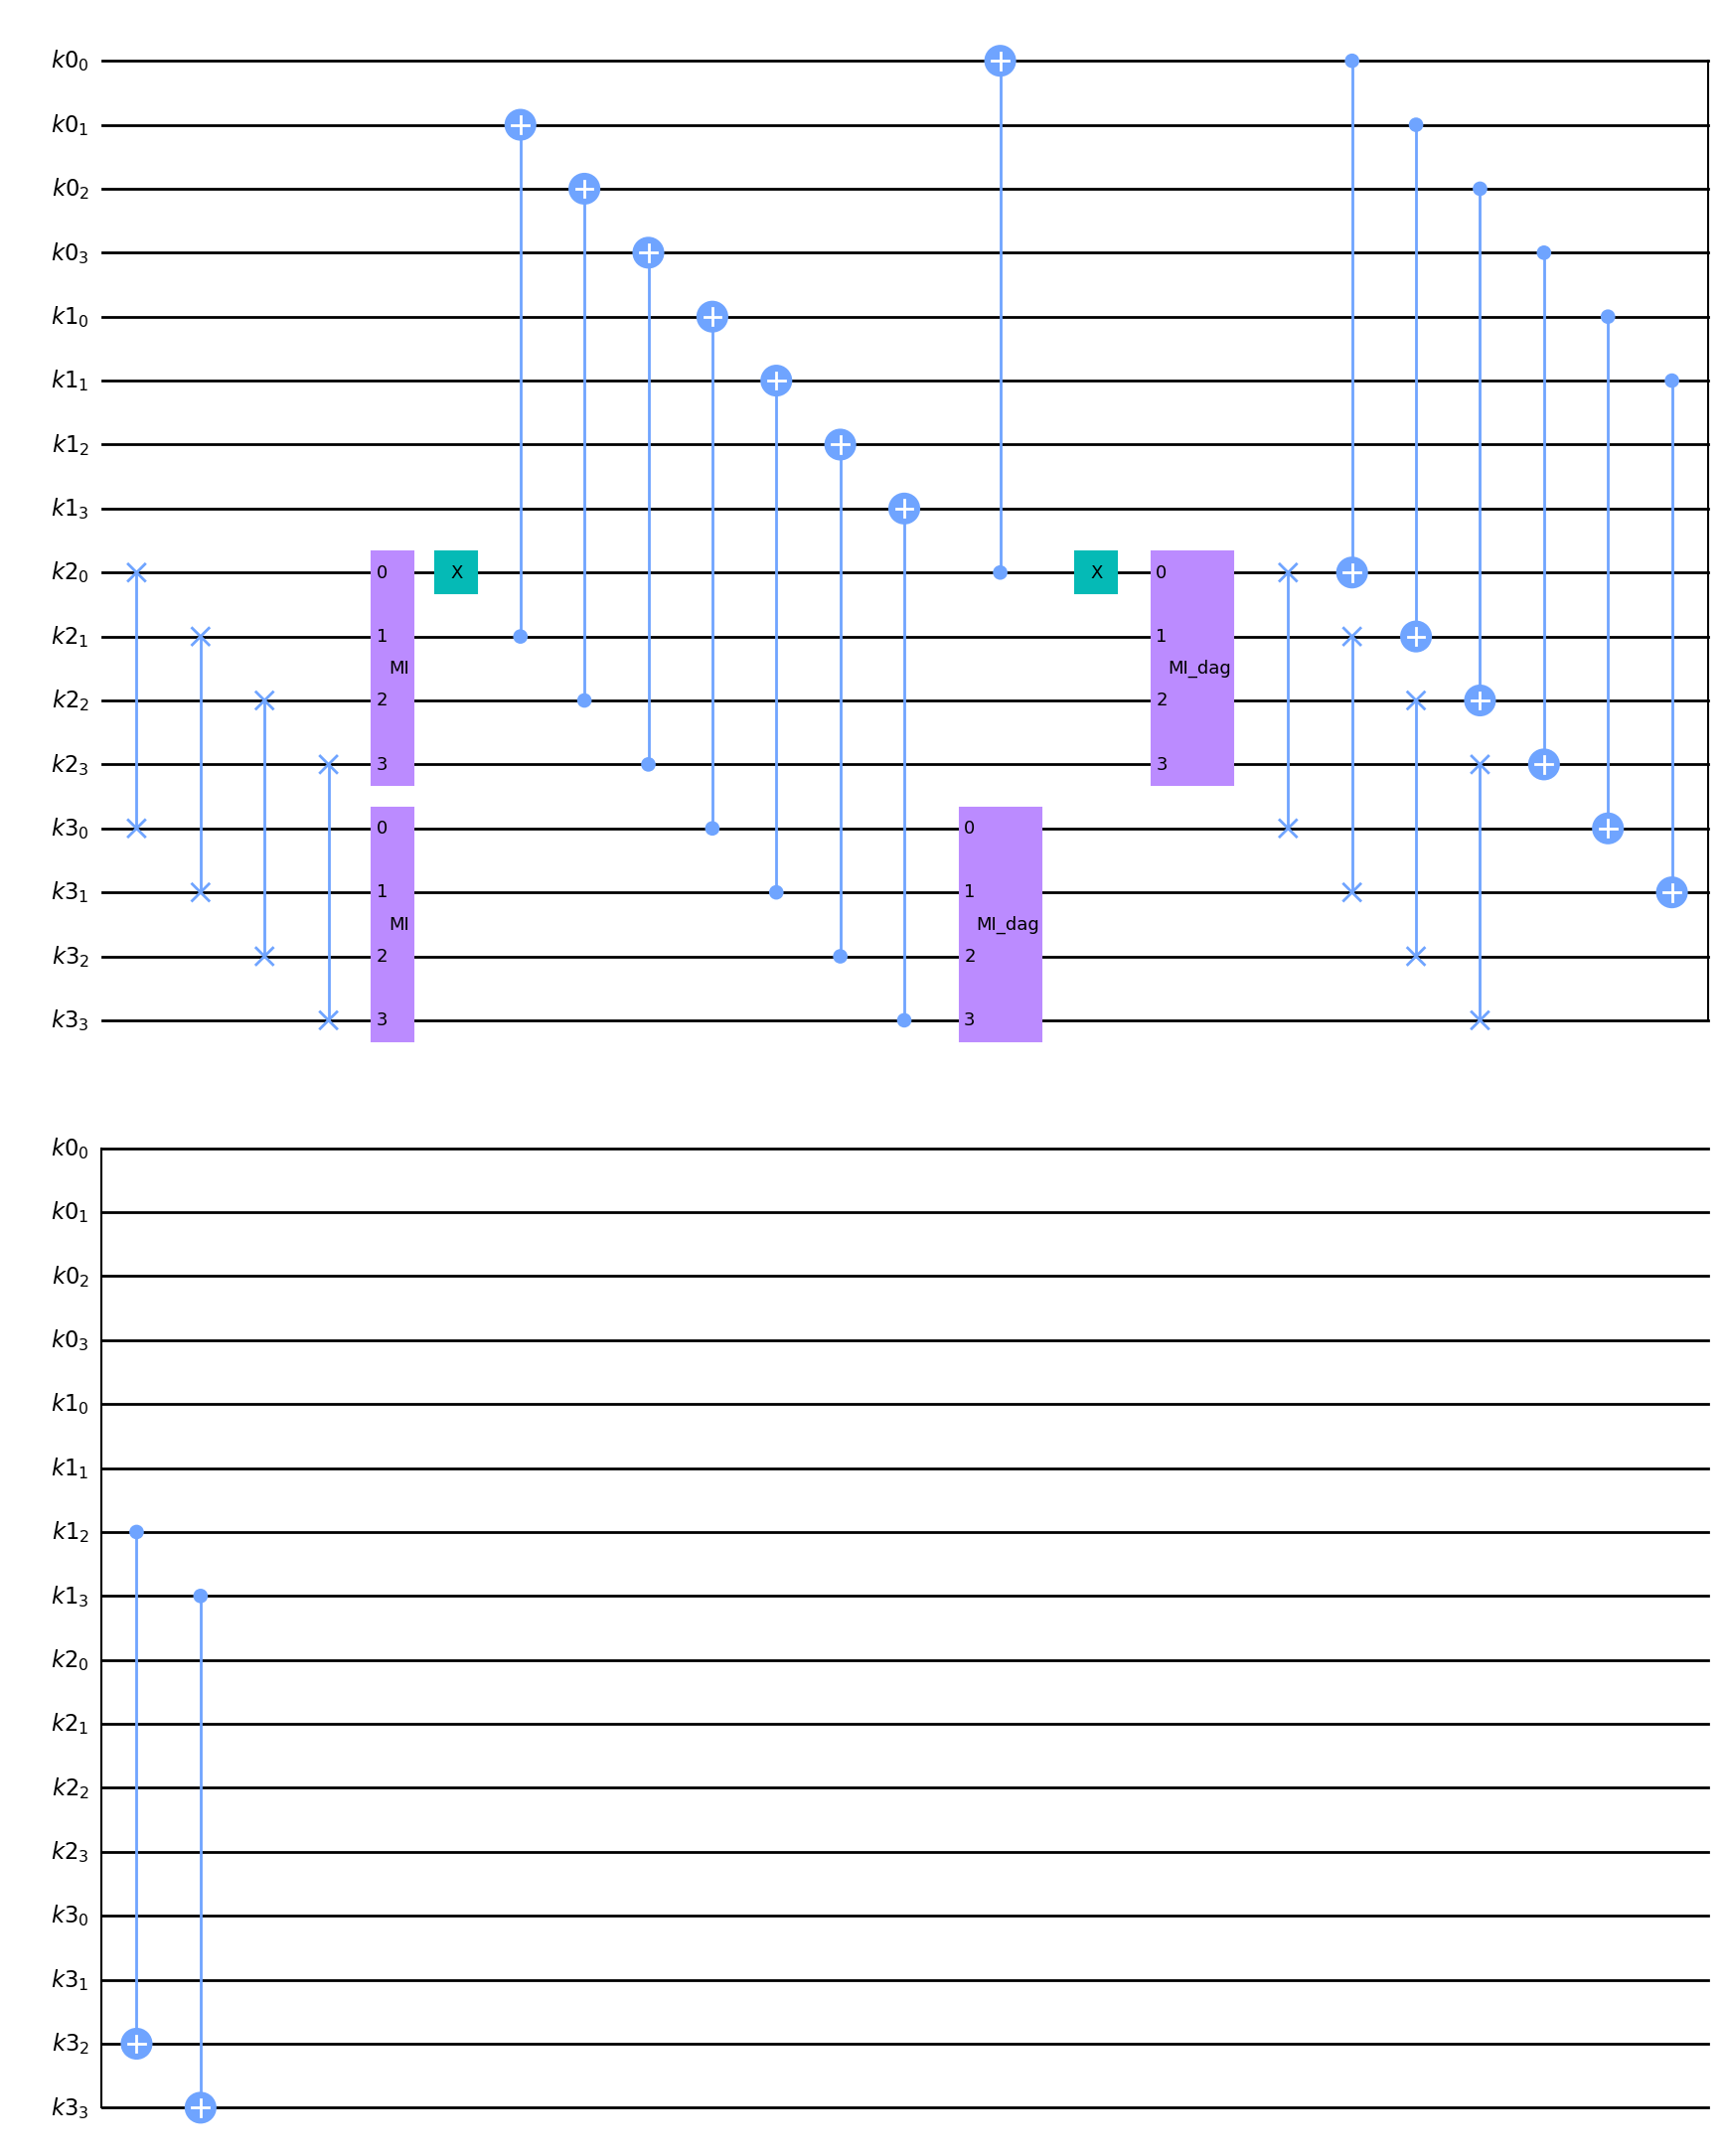

In [9]:
k0=QuantumRegister(4,name='k0')#Input register
k1=QuantumRegister(4,name='k1')#Input register
k2=QuantumRegister(4,name='k2')#Input register
k3=QuantumRegister(4,name='k3')#Input register

qc=QuantumCircuit(k0,k1,k2,k3)
# w1=[k2,k3]
qc.swap(k2[:],k3[:])
qc.append(MI,k2[:])
qc.append(MI,k3[:])
qc.x(k2[0])
qc.cx(k2[:]+k3[:],k0[:]+k1[:])

#--------------Reverse----------
qc.x(k2[0])
qc.append(MI_dag,k2[:])
qc.append(MI_dag,k3[:])
qc.swap(k2[:],k3[:])
#--------------------

qc.cx(k0[:]+k1[:],k2[:]+k3[:])
ke1=qc.to_gate(label='ke1')
qc.draw('mpl')

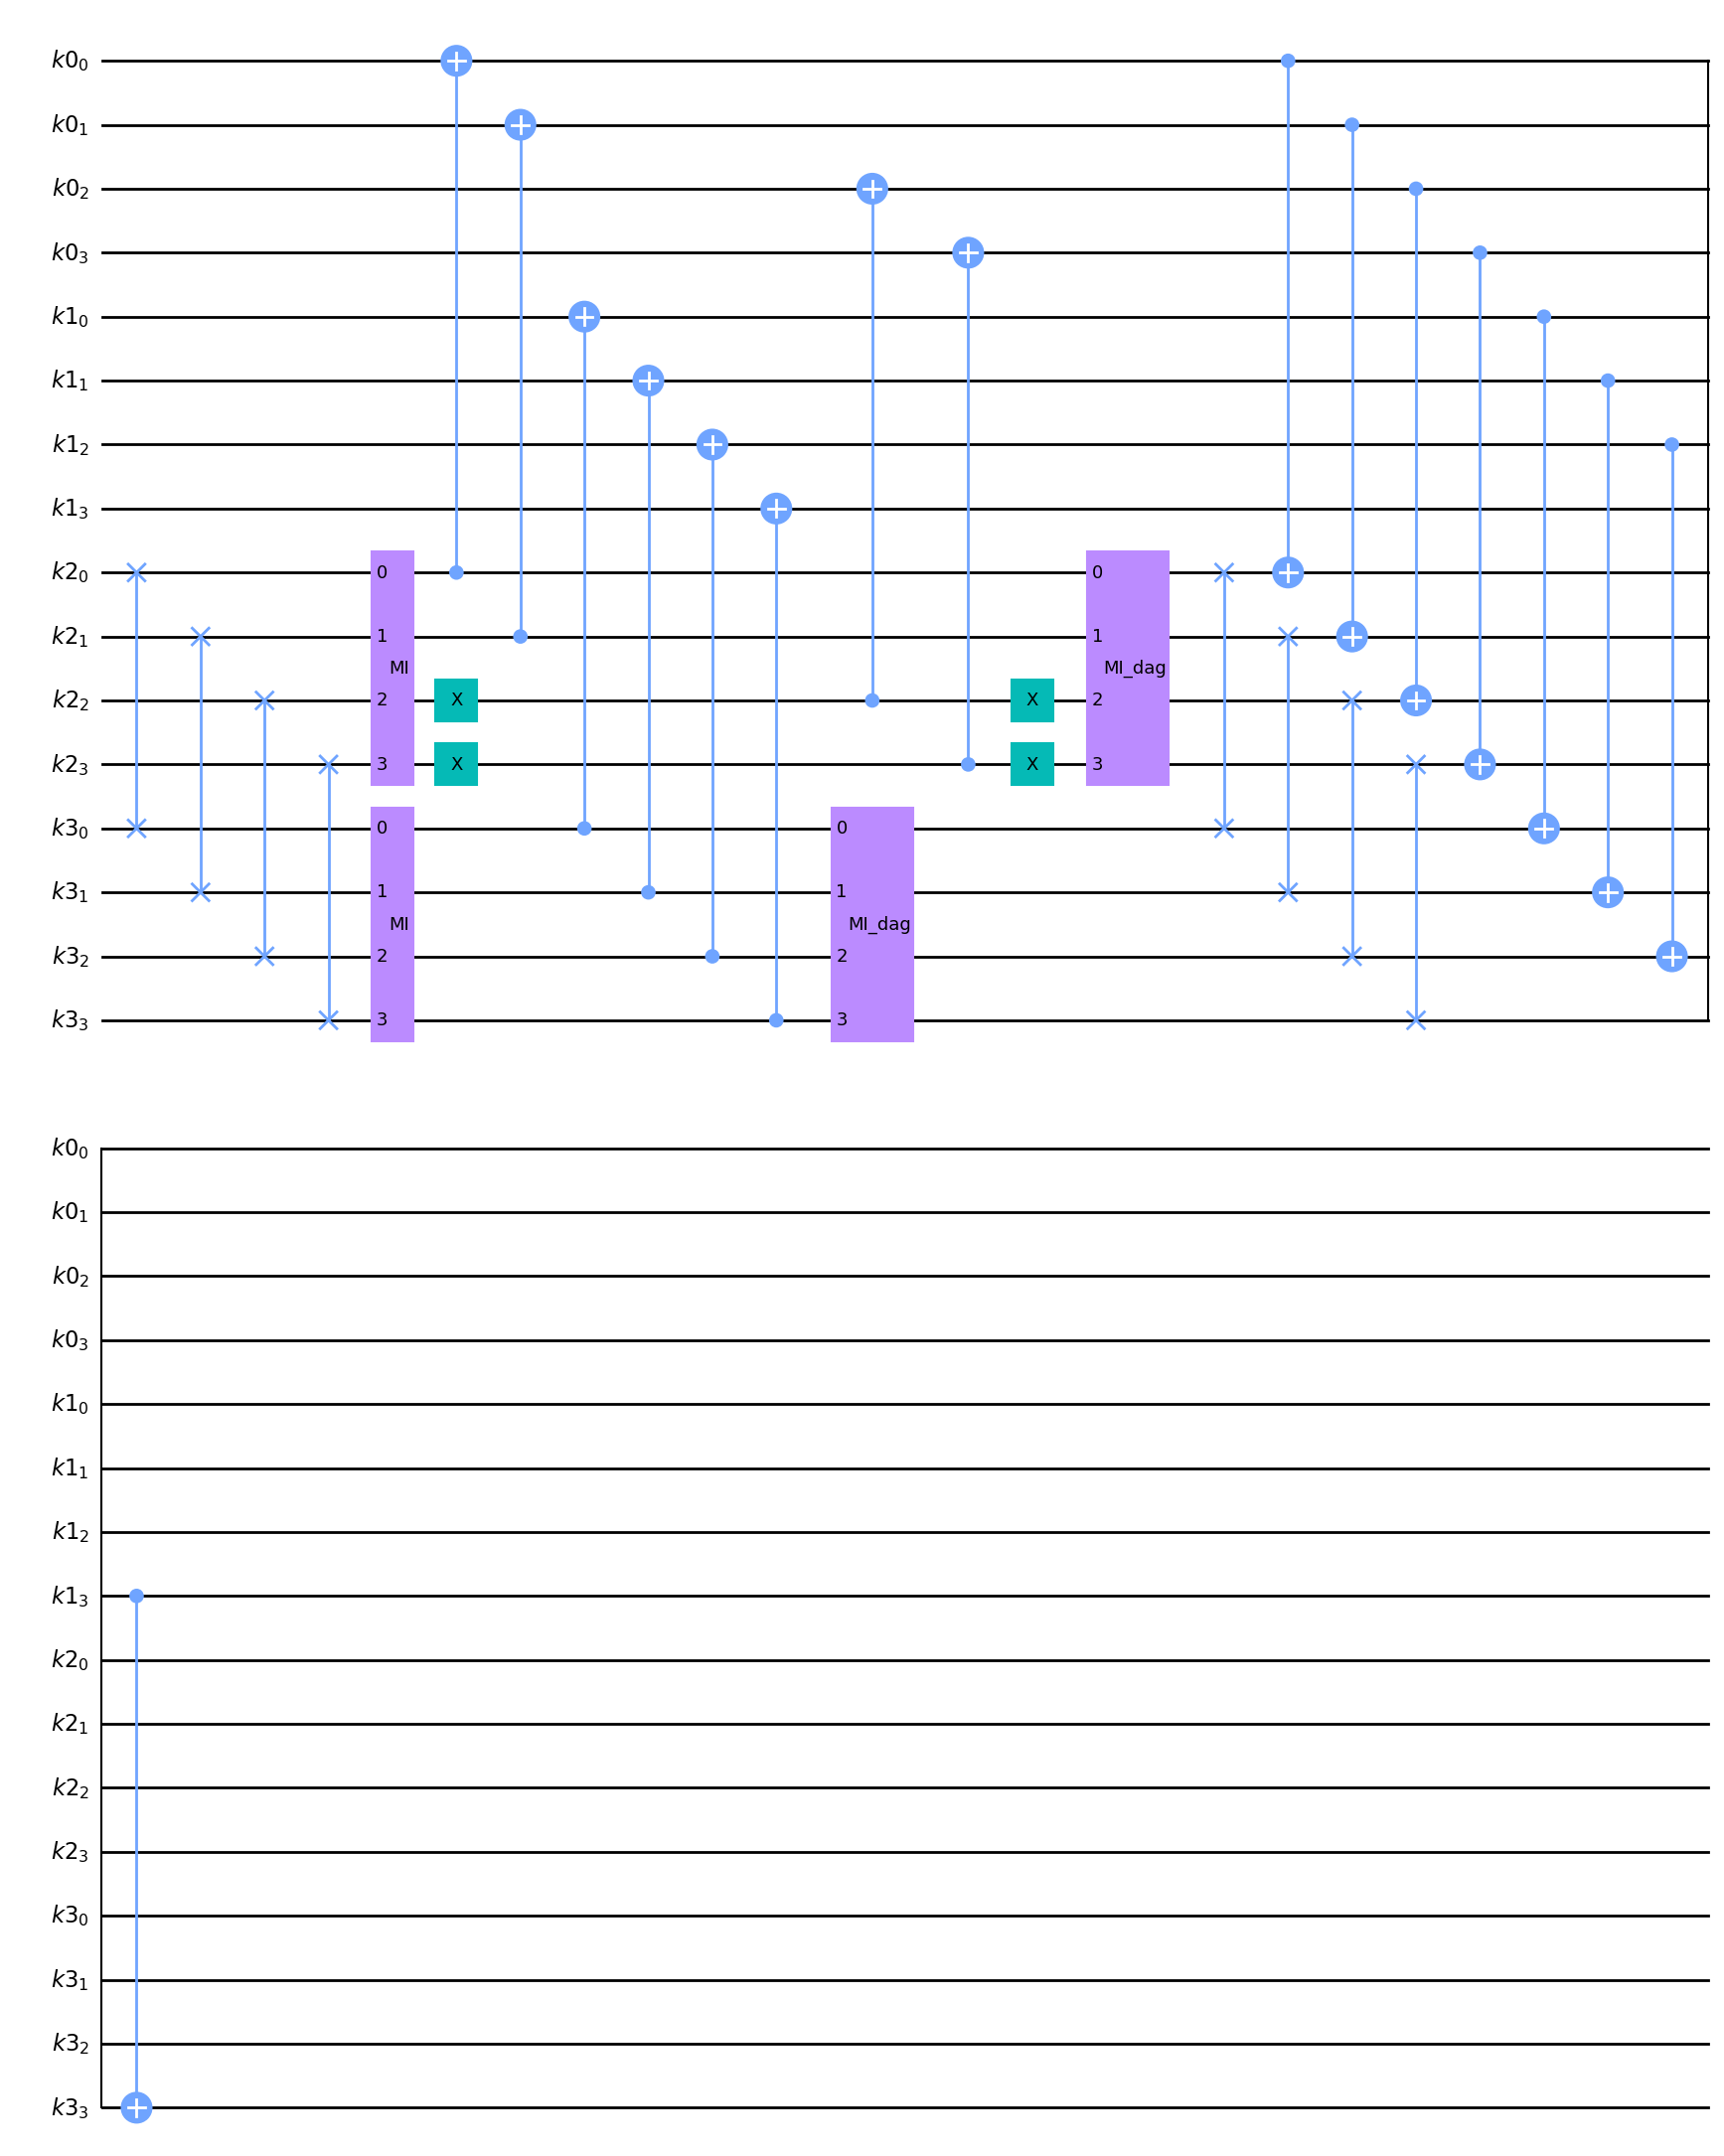

In [10]:
k0=QuantumRegister(4,name='k0')#Input register
k1=QuantumRegister(4,name='k1')#Input register
k2=QuantumRegister(4,name='k2')#Input register
k3=QuantumRegister(4,name='k3')#Input register

qc=QuantumCircuit(k0,k1,k2,k3)
# w1=[k2,k3]
qc.swap(k2[:],k3[:])
qc.append(MI,k2[:])
qc.append(MI,k3[:])
qc.x(k2[2:4])
qc.cx(k2[:]+k3[:],k0[:]+k1[:])

#--------------Reverse----------
qc.x(k2[2:4])
qc.append(MI_dag,k2[:])
qc.append(MI_dag,k3[:])
qc.swap(k2[:],k3[:])
#--------------------

qc.cx(k0[:]+k1[:],k2[:]+k3[:])
ke2=qc.to_gate(label='ke2')
qc.draw('mpl')

## Quantum circuit for  Encryption 

In [11]:
k=QuantumRegister(16,name='key')#Input register
m=QuantumRegister(16,name='msg')#Input register
cl=ClassicalRegister(16)
qc=QuantumCircuit(k,m)
#--------------Encode input-----
'''
inp='0110111101101011' 
key='1010011100111011'
for i in range(len(inp)):
    if inp[i]=='1':
        qc.x(16+i)   
        
for i in range(len(key)):
    if key[i]=='1':
        qc.x(i)    '''    
#qc.barrier()        

qc.cx(k[:],m[:])  #Add round key 

#-------Round 1----------
qc.append(MI,m[0:4])
qc.append(MI,m[4:8])
qc.append(MI,m[8:12])
qc.append(MI,m[12:16])
qc.swap(m[4:8],m[12:16])
qc.append(mc,m[0:4]+m[4:8])
qc.append(mc,m[8:12]+m[12:16])


qc.append(ke1,k[:])

qc.cx(k[:],m[:])  #Add round key 


#---------Round two-------
qc.append(MI,m[0:4])
qc.append(MI,m[4:8])
qc.append(MI,m[8:12])
qc.append(MI,m[12:16])
qc.swap(m[4:8],m[12:16]) #shift row

qc.append(ke2,k[:])

qc.cx(k[:],m[:])  #Add round key 


Enc=qc.to_gate(label='Enc')     #Quantum circuit for Encoding
Dec=qc.inverse().to_gate(label='Dec') #Quantum circuit for Decoding 
#qc.measure(m,cl[::-1])
#qc.draw('mpl')

In [12]:
# Simulate Encryption and decryption circuit 
k=QuantumRegister(16,name='key')#Input register
m=QuantumRegister(16,name='msg')#Input register
cl=ClassicalRegister(16)
qc=QuantumCircuit(k,m,cl)

inp='0110111101101011' 
key='1010011100111011'
res='0000 0111 0011 1000'
for i in range(len(inp)):
    if inp[i]=='1':
        qc.x(16+i)   
        
for i in range(len(key)):
    if key[i]=='1':
        qc.x(i) 
        
qc.append(Enc,k[:]+m[:])
qc.append(Dec,k[:]+m[:])
qc.measure(m,cl[::-1])


In [14]:
job=execute(qc,device, shots=50)
result=job.result().get_counts()
print(result)

inp='0110111101101011' 

{'0110111101101011': 50}


In [ ]:
#Quantum circuit for Grover attack 

k=QuantumRegister(16,name='key')#Input register
m=QuantumRegister(16,name='msg')#Input register
anc=QuantumRegister(1,name='anc')#Input register
cl=ClassicalRegister(16)
ckt=QuantumCircuit(k,m,anc,cl)


inp='0110111101101011' 
key='1010011100111011'
res='0000011100111000'

ckt.x(anc)
ckt.h(anc)         
ckt.h(k) 

#Encoding input 
for i in range(len(inp)):
    if inp[i]=='1':
        ckt.x(16+i)
        
for _ in range(256):    
    ckt.append(Enc,k[:]+m[:])
    
    for i in range(len(res)):
        if res[i]=='0':
            ckt.x(16+i)
            
    ckt.mcx(m[:],anc)  
    
    for i in range(len(res)):
        if res[i]=='0':
            ckt.x(16+i)
            
    ckt.append(Dec,k[:]+m[:])
    
ckt.measure(k,cl[::-1])

#ckt.draw()

In [ ]:
# Simulating attack 
job=execute(ckt,device, shots=5)
result=job.result().get_counts()
print(result)

## Simulator summary
1. Name: simulator_stabilizer , Qubits=5000        >> It simulates quantum circuits with clifford gates only 
2. Name: simulator_extended_stabilizer, Qubits=63  >> It give insufficient memory error 
3. Name: simulator_mps         , Qubits=100        >> It gives correct result 

(Here We need 33 qubits, so no other simulators are application for this job)

NOTE: In above circuits swap gates can be removed considering rewiring

# References 
 1. Quantum Grover Attack on the Simplified-AES [https://dl.acm.org/doi/pdf/10.1145/3185089.3185122]
 2. Simplified AES Example by Steven Gordon   [https://sandilands.info/sgordon/teaching/reports/simplified-aes-example.pdf]
